# Problem statement

Iris dataset

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, preprocessing, metrics, pipeline

from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions

%matplotlib inline

In [32]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


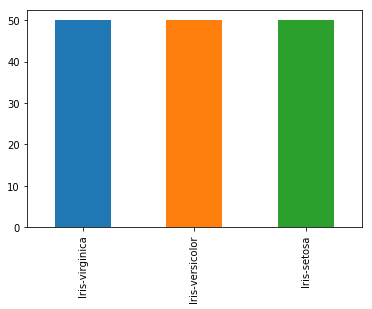

In [33]:
df.Species.value_counts().plot.bar()

In [34]:
features = ["SepalLengthCm", "PetalLengthCm"]

In [35]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

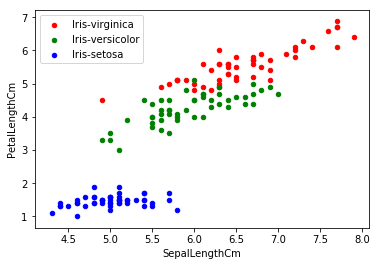

In [36]:
fig, ax = plt.subplots()
df[df.Species == "Iris-virginica"].plot.scatter(features[0], features[1], 
                                        color = "red", ax = ax, label = "Iris-virginica")
df[df.Species == "Iris-versicolor"].plot.scatter(features[0], features[1], 
                                color = "green", ax = ax, label = "Iris-versicolor")
df[df.Species == "Iris-setosa"].plot.scatter(features[0], features[1], 
                                        color = "blue", ax = ax, label = "Iris-setosa")


In [37]:
y = np.where(df.Species == "Iris-versicolor", 1, 0)
X = df[features].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                    test_size = 0.3, random_state = 1) 

In [38]:
pd.Series(y_test).value_counts()/len(y_test)

0    0.6
1    0.4
dtype: float64

Accuracy 0.6


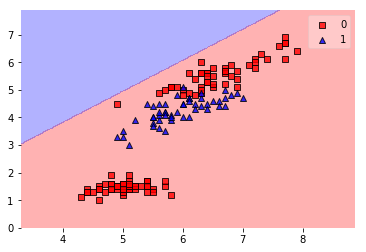

In [39]:
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_test_pred))
plot_decision_regions(X, y, pipe)

Accuracy 0.9777777777777777
CPU times: user 142 ms, sys: 20.3 ms, total: 163 ms
Wall time: 142 ms


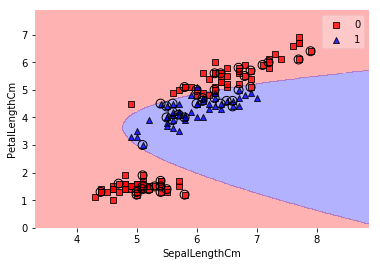

In [49]:
%%time
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=5, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_test_pred))
plot_decision_regions(X, y, pipe, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])

In [42]:
from sklearn import svm

Accuracy 0.9777777777777777


Text(0,0.5,'PetalLengthCm')

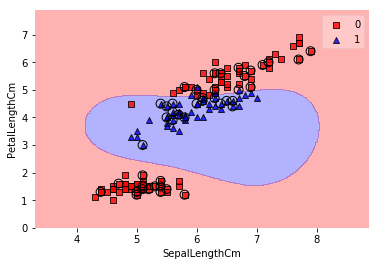

In [43]:
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", svm.SVC())
])
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_test_pred))
plot_decision_regions(X, y, pipe, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])

In [45]:
svm.SVC?

Accuracy 0.9777777777777777
CPU times: user 166 ms, sys: 5.96 ms, total: 172 ms
Wall time: 170 ms


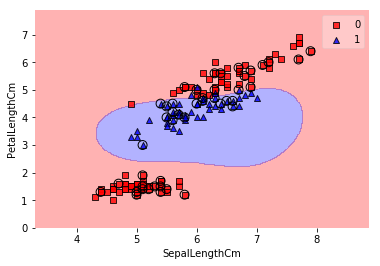

In [50]:
%%time
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", svm.SVC(gamma=1))
])
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_test_pred))
plot_decision_regions(X, y, pipe, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])

In [51]:
from sklearn import neighbors

Accuracy 0.9555555555555556
CPU times: user 158 ms, sys: 22.4 ms, total: 180 ms
Wall time: 182 ms


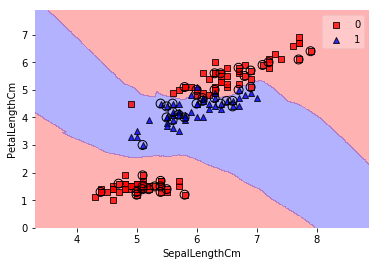

In [52]:
%%time
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", neighbors.KNeighborsClassifier())
])
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_test_pred))
plot_decision_regions(X, y, pipe, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])